# Logistic Regression using Stochastic Gradient Descent

## Logistic Regression
The logistic regression model takes real-valued inputs and makes a prediction as to the probability
of the input belonging to the default class (class 1). If the probability is greater than 0.5 we can
take the output as a prediction for the default class (class 1), otherwise the prediction is for
the other class (class 0). For this dataset, the logistic regression has three coefficients just like
linear regression, for example:

### <center>$output = B0 + B1 \times X0 + B2 \times X1$</center>

The job of the learning algorithm will be to discover the best values for the coefficients (B0,
B1 and B2) based on the training data. Unlike linear regression, the output is transformed into
a probability using the logistic function:

### <center>$p(class = 1) = \frac{1}{1+e^{-output}}$</center>


## Creating Fake data

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50, n_features=2, n_classes=2, n_redundant=0, random_state=101)

In [3]:
print("First 5 X:")
print(X[0:5,])
print("\nFirst 5 y:")
print(y[0:5])

First 5 X:
[[ 1.06906418 -2.74193917]
 [ 2.82158346  1.28185188]
 [-0.66408364 -0.95363232]
 [ 0.85559775  1.1921332 ]
 [-0.7028863  -1.0547168 ]]

First 5 y:
[1 1 0 1 0]


In [4]:
import matplotlib.pyplot as plt

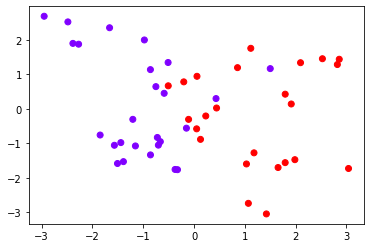

In [5]:
plt.scatter(X[:,0], X[:,1], c = y, cmap="rainbow")

## Using Stochastic Gradient Descent

### Step 1: Calculate Prediction

Let’s start off by assigning 0.0 to each coefficient and calculating the probability of the first
training instance

In [6]:
b0 = 0
b1 = 0
b2 = 0

In [7]:
from math import exp
output = b0 + b1*X[0,0] + b2*X[0,1]
prediction = 1/(1+exp(-1*output))
print(prediction)

0.5


### Step 2: Calculate new Coefficients
We can calculate the new coefficient values using a simple update equation:
### <center>$b = b + \alpha \times (y - prediction) \times prediction \times (1 - prediction) \times x$</center>
where $\alpha $ is learning rate. Let's choose $\alpha = 0.3$

### Derivation
### $\hat{y} = \frac{1}{1+e^{b_0 + b_1\cdot x}}$
### $b_{new} = b_{old} - \alpha \times \frac{\partial}{\partial b}Loss(B)$
### $Loss(B) = (y - \hat{y})^2$ (in Stocastic Gradient)
### $\frac{\partial}{\partial b_i}Loss(B) = \frac{\partial}{\partial b_i}(y - \hat{y})^2$
### $= 2(y - \hat{y})\frac{\partial}{\partial b_i}(y - \hat{y})$
### $= -2(y - \hat{y})\cdot \hat{y}\cdot (1 - \hat{y}) \cdot \frac{\partial}{\partial b_i}(b_0+b_1\cdot x)$  As for $y = \sigma (x)$, $\frac{\partial y}{\partial x} = y(1 - y)$
### $\implies \frac{\partial Loss(b)}{\partial b_0} = -2(y - \hat{y})\cdot \hat{y}\cdot (1 - \hat{y}) \cdot \frac{\partial}{\partial b_0}(b_0+b_1\cdot x)$
### $= -2(y - \hat{y})\cdot \hat{y}\cdot (1 - \hat{y})$
### Also
### $\frac{\partial Loss(b)}{\partial b_1} = -2(y - \hat{y})\cdot \hat{y}\cdot (1 - \hat{y}) \cdot \frac{\partial}{\partial b_1}(b_0+b_1\cdot x)$
### $= -2(y - \hat{y})\cdot \hat{y}\cdot (1 - \hat{y}) \cdot x$
### So
### $b_0 = b_0 + \alpha \cdot (y - \hat{y}) \cdot \hat{y} \cdot (1 - \hat{y})$
### $b_1 = b_1 + \alpha \cdot (y - \hat{y}) \cdot \hat{y} \cdot (1 - \hat{y}) \cdot x$

Similarly it can be extended for $b_2$

In [8]:
alpha = 0.3
b0 = b0 + alpha*(y[0]-prediction)*prediction*(1-prediction)*1
b1 = b1 + alpha*(y[0]-prediction)*prediction*(1-prediction)*X[0,0]
b2 = b2 + alpha*(y[0]-prediction)*prediction*(1-prediction)*X[0,1]
print("b0 =",b0)
print("b1 =",b1)
print("b2 =",b2)

b0 = 0.0375
b1 = 0.040089906932183124
b2 = -0.1028227188303725


### Step 3: Repeat the process
We can repeat this process and update the model for each training instance in the dataset. A single iteration through the training dataset is called an **epoch**. It is common to repeat the stochastic gradient descent procedure for a fixed number of epochs. At the end of epoch you can calculate error values for the model.

### Complete code for binary logistic regression with stochastic gradient descent

In [9]:
from sklearn.metrics import accuracy_score
def get_accuracy(b0, b1, b2):
    yhat = []
    for i in range(0, 50):
        output = b0 + b1*X[i,0] + b2*X[i,1]
        probability = 1/(1+exp(-1*output))
        if(probability > 0.5):
            yhat.append(1)
        else:
            yhat.append(0)
    return accuracy_score(y, yhat)

In [10]:
b0 = 0
b1 = 0
b2 = 0
alpha = 0.3
accuracy=[]
for epoch in range(0, 30):
    for i in range(0, 50):
        output = b0 + b1*X[i,0] + b2*X[i,1]
        prediction = 1/(1+exp(-1*output))
        b0 = b0 + alpha*(y[i]-prediction)*prediction*(1-prediction)*1
        b1 = b1 + alpha*(y[i]-prediction)*prediction*(1-prediction)*X[i,0]
        b2 = b2 + alpha*(y[i]-prediction)*prediction*(1-prediction)*X[i,1]
    accuracy.append(get_accuracy(b0, b1, b2))

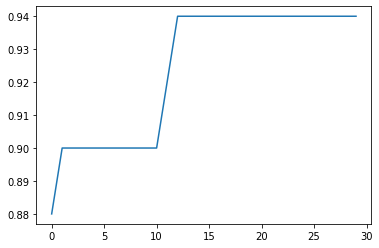

In [11]:
plt.plot(range(0,30), accuracy)

In [12]:
print("B0 =", b0)
print("B1 =", b1)
print("B2 =", b2)

B0 = 0.6469558836416578
B1 = 3.1365781359367455
B2 = 0.3955425768683053


In [13]:
from sklearn.metrics import classification_report

In [15]:
predictions = []
for x in X:
    p = b0 + b1*x[0] + b2*x[1]
    if(p > 0.5):
        predictions.append(1)
    else:
        predictions.append(0)

In [16]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.91      0.88      0.89        24

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

